In [1]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from pyresample import kd_tree, geometry 

np.fromfile(fname, dtype=dt)
array([((10, 0), 98.25)],
      dtype=[('time', [('min', '<i4'), ('sec', '<i4')]), ('temp', '<f8')])

In [2]:
grd_file = r'/Users/gonzalgo/Downloads/greenl_00411_16035_004_160326_ALTTBB_HH_03.hgt.grd'

glob.glob('/Users/gonzalgo/Downloads/*')

In [3]:
data = np.fromfile(grd_file, dtype = '<f4')

In [4]:
data.shape

(513583532,)

In [5]:
len(data)/35668

14399.0

In [6]:
np.min(data)

-10000.0

In [87]:
np.max(data)

546.88666

In [7]:
data = np.reshape(data,(35668, 14399))

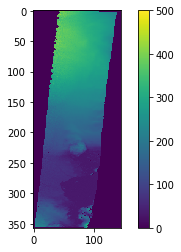

In [8]:
plt.imshow(data[::100, ::100], vmin=0, vmax=500);plt.colorbar()

In [40]:
x_ma = np.where(data > -10000, data, np.nan)

In [10]:
x_ma.shape

(35668, 14399)

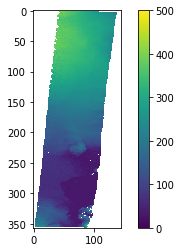

In [11]:
plt.imshow(x_ma[::100, ::100], vmin=0, vmax=500);plt.colorbar()

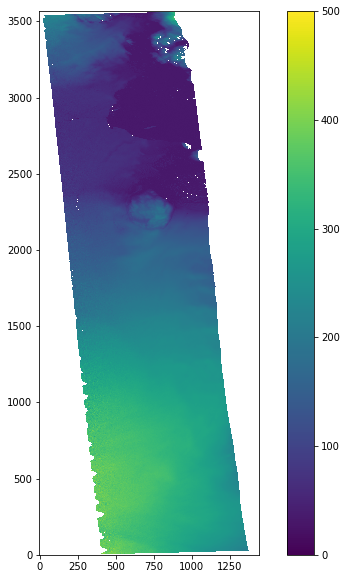

In [41]:
plt.figure(figsize=(10,10));plt.imshow(x_ma[::10, ::10], origin='lower', vmin=0, vmax=500);plt.colorbar()

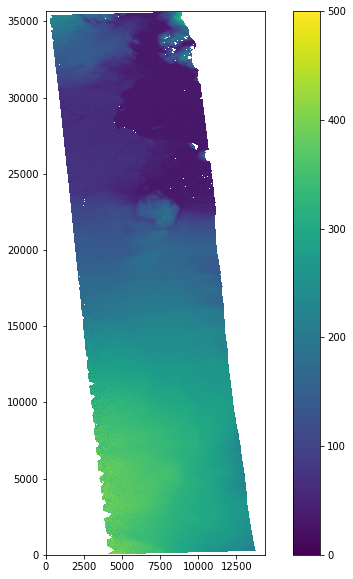

In [28]:
plt.figure(figsize=(10,10));plt.imshow(x_ma, vmin=0, vmax=500, origin='lower');plt.colorbar()

In [29]:
lats = np.linspace(77.49109, 76.50031, 35669)
lons = np.linspace(-22.74941,-21.94946, 14400)

CPU times: user 31.7 ms, sys: 3.59 ms, total: 35.3 ms
Wall time: 35.3 ms


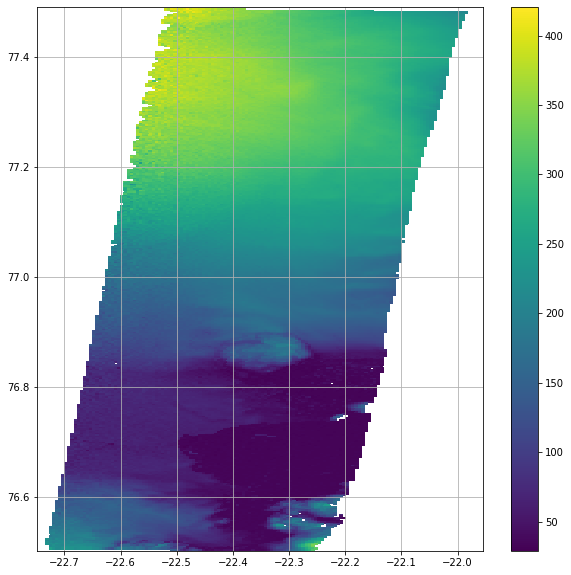

In [30]:
%time plt.figure(figsize=(10,10));plt.pcolormesh(lons[::100],lats[::100],x_ma[::100,::100]);plt.grid();plt.colorbar()

## Area of original swath

In [43]:
x_masubset = x_ma[::100, ::100]

In [44]:
x_masubset.shape

(357, 144)

In [64]:
area_id = 'ease'
description = 'ease grid north'
proj_id = 'greenl_00411_16'
proj_string = 'EPSG:4326'
width = 144
height = 357
area_extent = (-22.9, 76.5, -21.9, 77.5)
area_originaltest = geometry.AreaDefinition(area_id, description, \
                                    proj_id, proj_string, width, 
                                    height, area_extent)\

In [65]:
lon_test,lat_test = area_originaltest.get_lonlats()

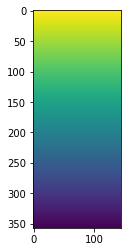

In [66]:
plt.imshow(lat_test)

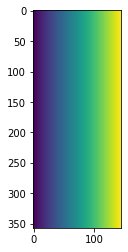

In [67]:
plt.imshow(lon_test)

In [68]:
area_id = 'ease'
description = 'ease grid north'
proj_id = 'greenl_00411_16'
proj_string = 'EPSG:32627'
width = 100
height = 300
area_extent = (450000, 8490000, 476000, 8600000)
area_originaltest3 = geometry.AreaDefinition(area_id, description, \
                                    proj_id, proj_string, width, 
                                    height, area_extent)\

In [84]:
ynew = np.linspace(8600000, 8490000, 301)
xnew = np.linspace(450000, 476000, 101)
xx, yy = np.meshgrid(xnew, ynew)

In [80]:
lon_test,lat_test = area_originaltest3.get_lonlats()

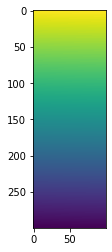

In [71]:
plt.imshow(lat_test)

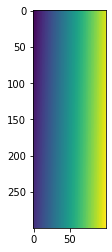

In [72]:
plt.imshow(lon_test)

In [88]:
%time result = kd_tree.resample_nearest(area_originaltest, x_masubset, area_originaltest3, radius_of_influence=1000, fill_value=np.nan)

CPU times: user 89.3 ms, sys: 145 ms, total: 234 ms
Wall time: 408 ms


In [89]:
area_originaltest.shape

(357, 144)

In [90]:
x_masubset.shape

(357, 144)

In [92]:
area_originaltest3.shape

(300, 100)

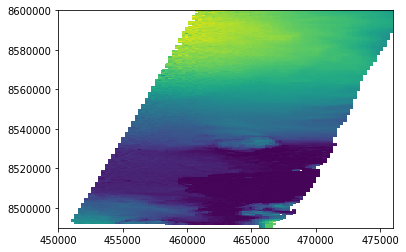

In [85]:
plt.pcolormesh(xx, yy, result)

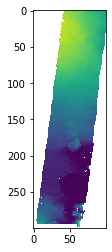

In [75]:
plt.imshow(result)

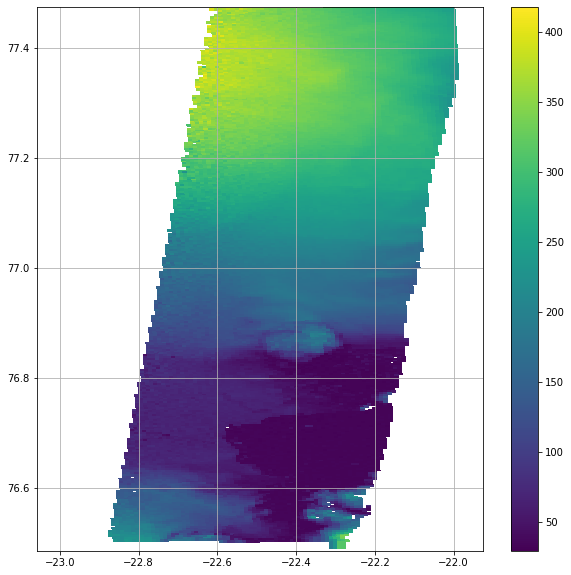

In [86]:
plt.figure(figsize=(10,10));plt.pcolormesh(lon_test, lat_test, result);plt.grid();plt.colorbar()

### Original area and data have to be the same shape

In [17]:
data.shape

(35668, 14399)

In [18]:
area_original.shape

(35668, 14399)

## Area of new common grid in different coordinate system

In [32]:
area_id = 'ease'
description = 'ease grid north'
proj_id = 'greenl_00411_16'
proj_string = 'EPSG:6931'
width = 100
height = 100
area_extent = (-588579, -1401656, -506010, -1270693)
area_new = geometry.AreaDefinition(area_id, description, \
                                    proj_id, proj_string, width, 
                                    height, area_extent)\

In [33]:
area_new.shape

(100, 100)

In [34]:
xe = np.linspace(-588579, -506010, 100)
ye = np.linspace(-1401656, -1270693, 100)
xx, yy = np.meshgrid(xe, ye)

In [36]:
%time result = kd_tree.resample_nearest(area_original, x_ma, area_new, radius_of_influence=1000, fill_value=np.nan)

CPU times: user 2min 22s, sys: 4min 13s, total: 6min 35s
Wall time: 9min 48s


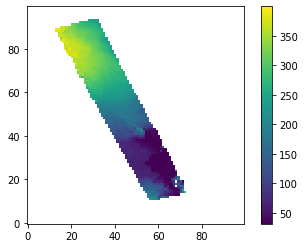

In [37]:
plt.imshow(result, origin='lower');plt.colorbar()

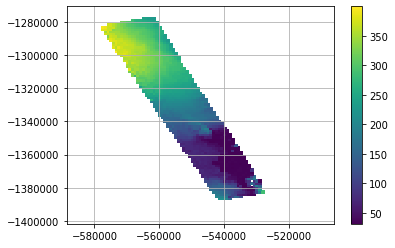

In [38]:
 plt.pcolormesh(xx, yy, result);plt.colorbar();plt.grid()